# Task 2: Exploratory Data Analysis

## Step 1: Setup and Data Loading

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
path= '/content/drive/MyDrive/ElevateLabs/task1/Titanic-Dataset.csv'

df= pd.read_csv(path)

In [5]:
# Display basic info
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Descriptive Statistics

In [6]:
# Numerical features summary
print("Numerical Features Summary:")
display(df.describe())

Numerical Features Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Categorical features summary
print("Categorical Features Summary:")
display(df.describe(include=['object']))

Categorical Features Summary:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [8]:
# Missing values
print("Missing Values:")
display(df.isnull().sum())

Missing Values:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Step 3: Univariate Analysis

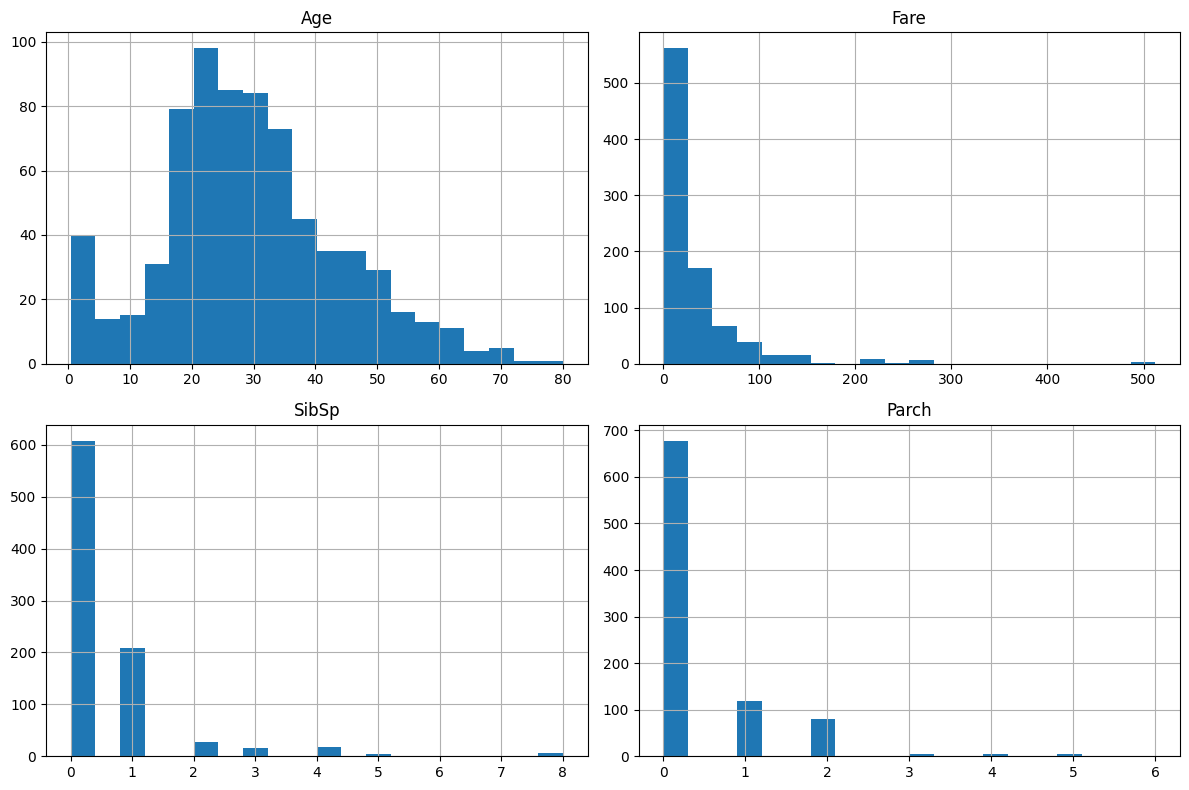

In [9]:
# Histograms for numerical features
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

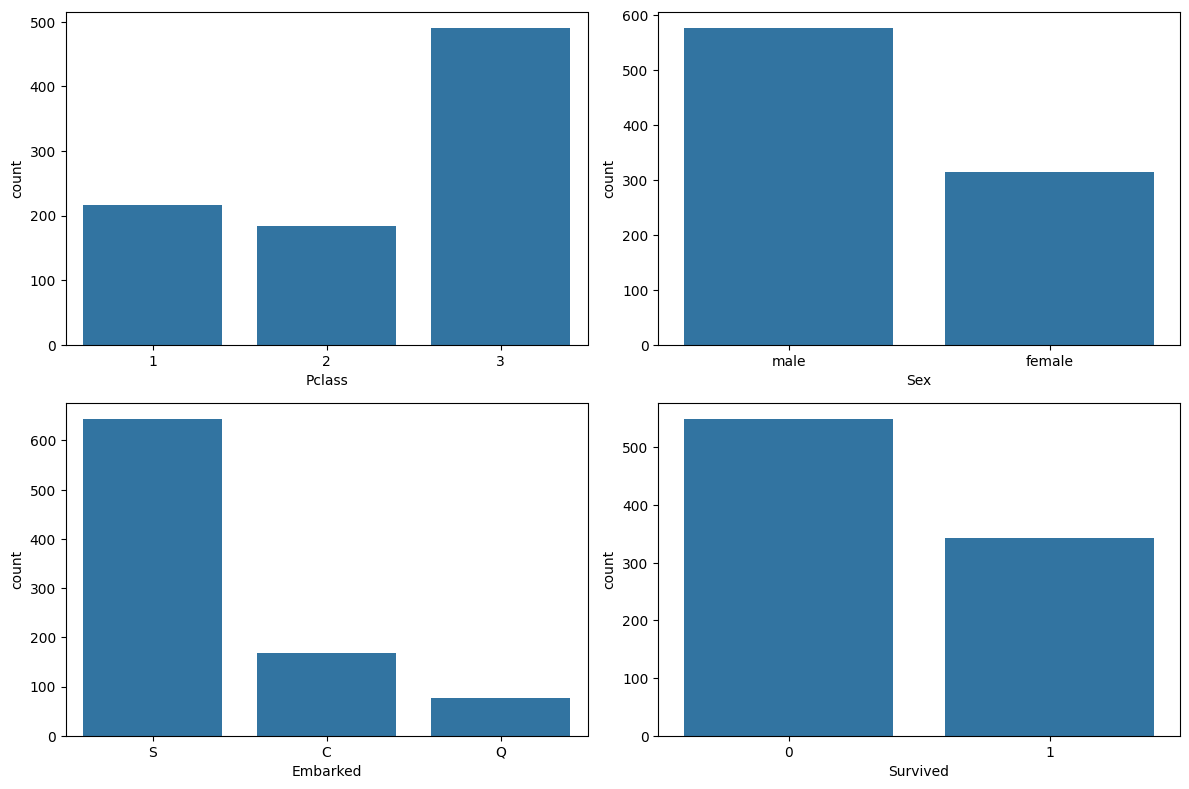

In [10]:
# Bar plots for categorical features
cat_cols = ['Pclass', 'Sex', 'Embarked', 'Survived']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for col, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(x=col, data=df, ax=ax)
plt.tight_layout()
plt.show()

## Step 4: Bivariate/Multivariate Analysis

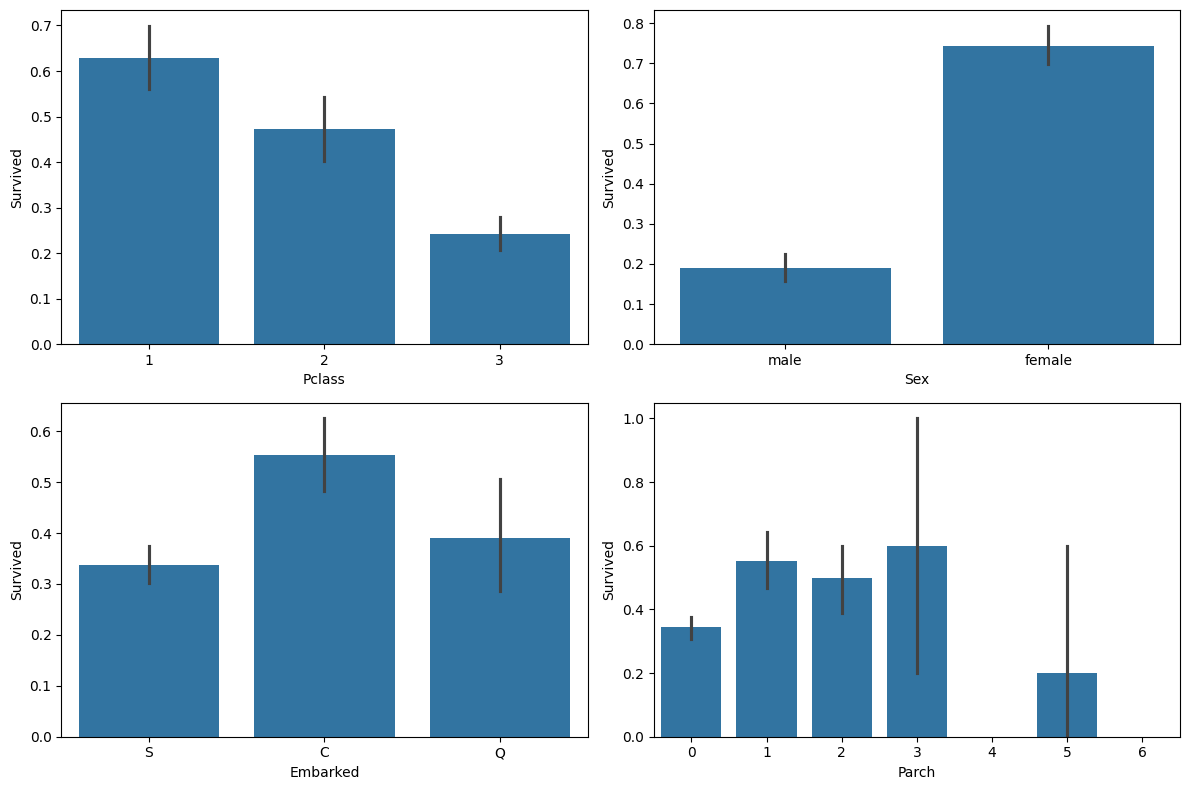

In [11]:
# Survival rate by different features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 0])
sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 1])
sns.barplot(x='Embarked', y='Survived', data=df, ax=axes[1, 0])
sns.barplot(x='Parch', y='Survived', data=df, ax=axes[1, 1])
plt.tight_layout()
plt.show()

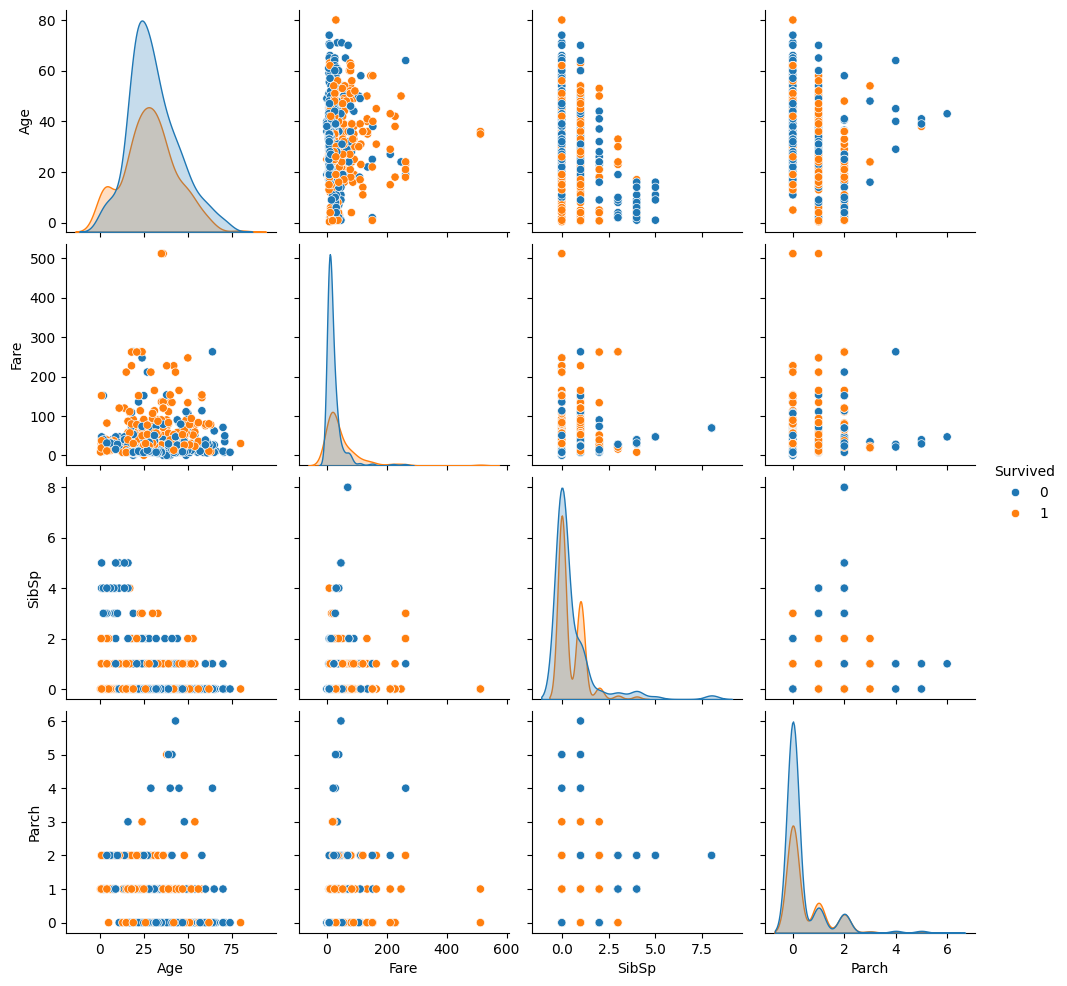

In [12]:
# Pairplot for numerical features
sns.pairplot(df[num_cols + ['Survived']], hue='Survived')
plt.show()

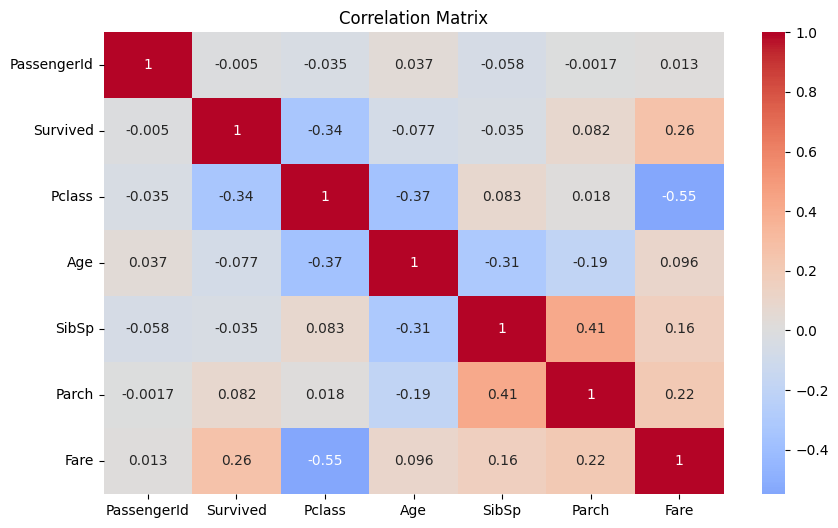

In [13]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Step 5: Outlier Detection

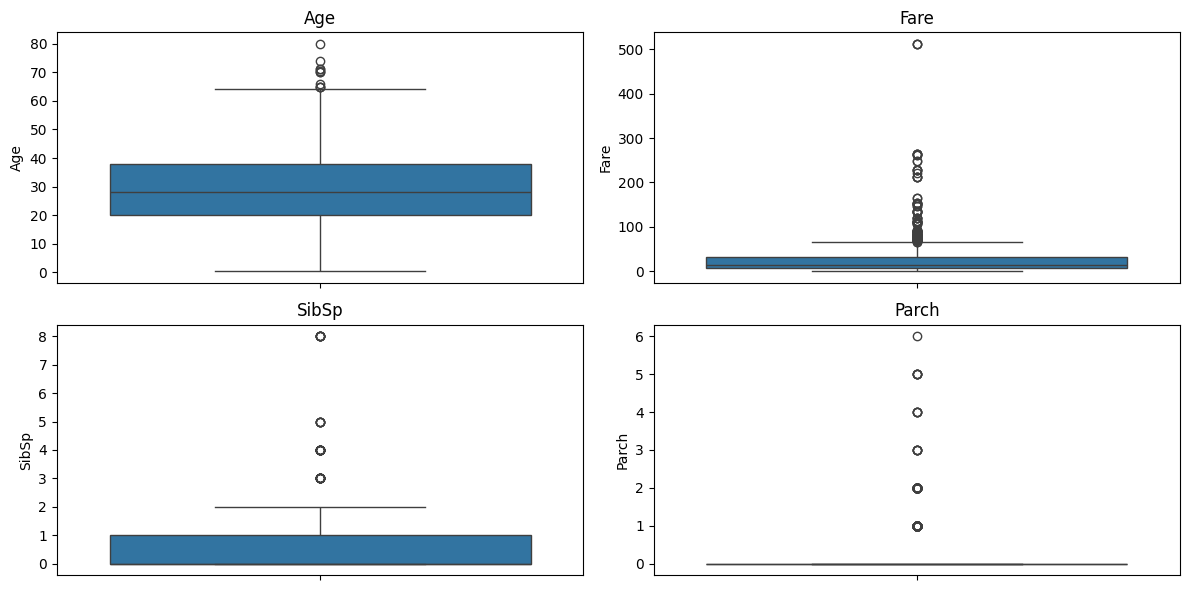

In [14]:
# Boxplots for numerical features
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
# Z-score analysis for outliers
for col in num_cols:
    z_scores = stats.zscore(df[col].dropna())
    outliers = np.abs(z_scores) > 3
    print(f"{col} - Outliers: {outliers.sum()}")

Age - Outliers: 2
Fare - Outliers: 20
SibSp - Outliers: 30
Parch - Outliers: 15


## Step 6: Advanced Visualizations

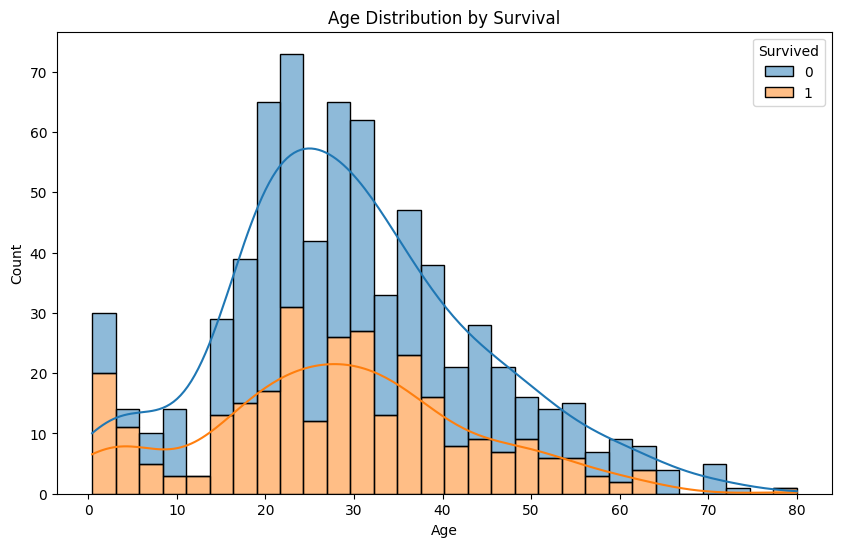

In [16]:
# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')
plt.show()

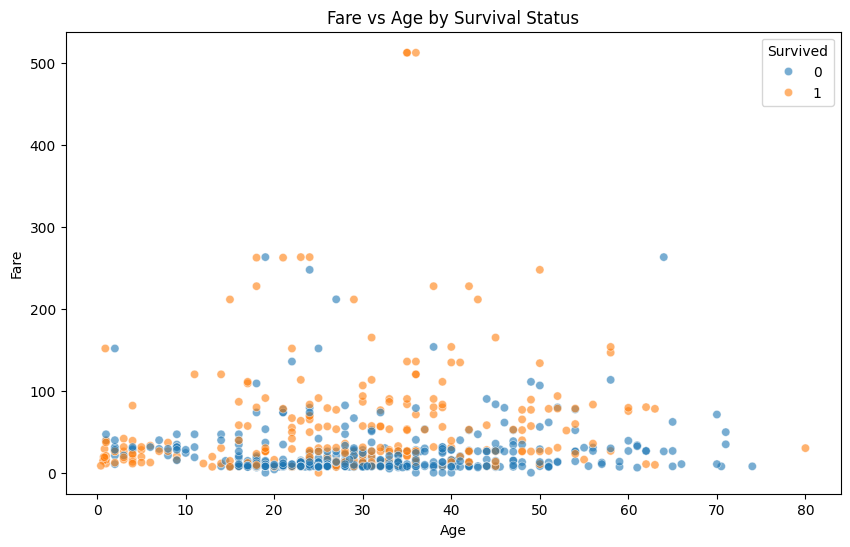

In [17]:
# Fare vs Age colored by survival
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', alpha=0.6)
plt.title('Fare vs Age by Survival Status')
plt.show()

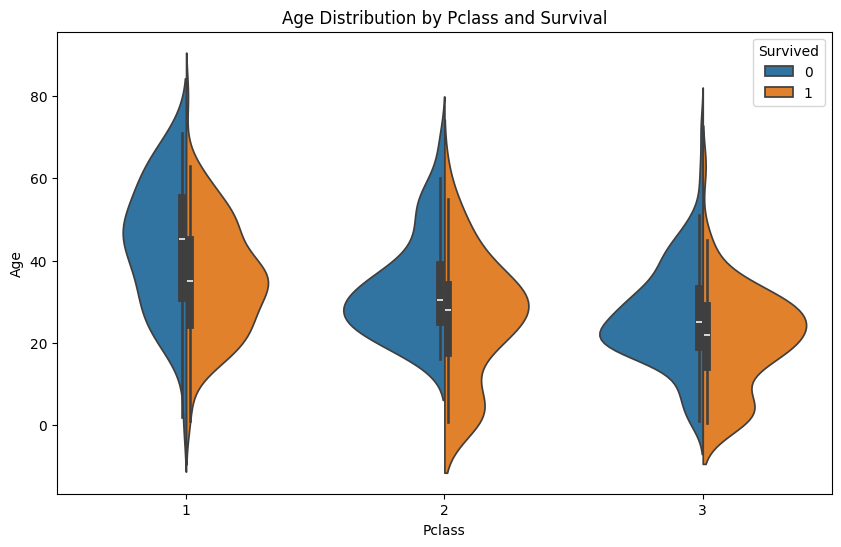

In [18]:
# Violin plots for age distribution
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title('Age Distribution by Pclass and Survival')
plt.show()